In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('realtor-data.csv')
data.info()
data.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203126 entries, 0 to 203125
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        203126 non-null  object 
 1   price         203126 non-null  float64
 2   bed           171963 non-null  float64
 3   bath          172835 non-null  float64
 4   acre_lot      151066 non-null  float64
 5   full_address  203126 non-null  object 
 6   street        203041 non-null  object 
 7   city          203074 non-null  object 
 8   state         203126 non-null  object 
 9   zip_code      202931 non-null  float64
 10  house_size    173448 non-null  float64
 11  sold_date     75339 non-null   object 
dtypes: float64(6), object(6)
memory usage: 18.6+ MB


<bound method NDFrame.head of           status      price  bed  bath  acre_lot  \
0       for_sale   105000.0  3.0   2.0      0.12   
1       for_sale    80000.0  4.0   2.0      0.08   
2       for_sale    67000.0  2.0   1.0      0.15   
3       for_sale   145000.0  4.0   2.0      0.10   
4       for_sale    65000.0  6.0   2.0      0.05   
...          ...        ...  ...   ...       ...   
203121  for_sale  1995000.0  1.0   1.0      0.05   
203122  for_sale  3495000.0  6.0   5.0      1.22   
203123  for_sale  2400000.0  NaN   1.0      0.08   
203124  for_sale  2999000.0  3.0   4.0      0.36   
203125  for_sale  7800000.0  4.0   4.0      0.91   

                                             full_address  \
0       Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601   
1                 Km 78 9 Carr # 135, Adjuntas, PR, 00601   
2                 556G 556-G 16 St, Juana Diaz, PR, 00795   
3       R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...   
4                         14 Navarro, Ma

In [4]:
X = data[['bath','acre_lot', 'house_size']]
Y = data['state']

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(X[['bath','acre_lot', 'house_size']])
X[['bath','acre_lot', 'house_size']] = imputer.transform(X[['bath','acre_lot', 'house_size']])
X

C:\Users\saidu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,bath,acre_lot,house_size
0,2.0,0.12,920.00000
1,2.0,0.08,1527.00000
2,1.0,0.15,748.00000
3,2.0,0.10,1800.00000
4,2.0,0.05,2234.71629
...,...,...,...
203121,1.0,0.05,700.00000
203122,5.0,1.22,5302.00000
203123,1.0,0.08,2328.00000
203124,4.0,0.36,2314.00000


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(162500, 3)
(40626, 3)
(162500,)
(40626,)


In [8]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162500 entries, 169872 to 57735
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bath        162500 non-null  float64
 1   acre_lot    162500 non-null  float64
 2   house_size  162500 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


,bath,acre_lot,house_size
count,162500.000000,162500.000000,1.625000e+05
mean,2.618114,8.820203,2.237217e+03
std,2.646706,558.112854,4.233391e+03
min,1.000000,0.000000,1.000000e+02
25%,2.000000,0.190000,1.234000e+03
50%,2.620129,0.770000,1.981000e+03
75%,3.000000,8.730882,2.449000e+03
max,198.000000,100000.000000,1.450112e+06


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162500 entries, 169872 to 57735
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bath        162500 non-null  float64
 1   acre_lot    162500 non-null  float64
 2   house_size  162500 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(X_train[['bath','acre_lot', 'house_size']])
X_train[['bath','acre_lot', 'house_size']] = imputer.transform(X_train[['bath','acre_lot', 'house_size']])
X_train

,bath,acre_lot,house_size
169872,3.000000,0.320000,2275.00000
101337,2.000000,0.460000,1655.00000
14738,2.620129,0.850000,2234.71629
158072,2.000000,8.730882,1410.00000
152585,2.000000,8.730882,1265.00000
...,...,...,...
149439,3.000000,0.090000,1697.00000
51071,1.000000,0.820000,1008.00000
41760,1.000000,0.320000,1052.00000
103827,1.000000,8.730882,971.00000


In [11]:
Y_train = Y_train.fillna('N/A')

array([[<AxesSubplot:xlabel='bath', ylabel='bath'>,
        <AxesSubplot:xlabel='acre_lot', ylabel='bath'>,
        <AxesSubplot:xlabel='house_size', ylabel='bath'>],
       [<AxesSubplot:xlabel='bath', ylabel='acre_lot'>,
        <AxesSubplot:xlabel='acre_lot', ylabel='acre_lot'>,
        <AxesSubplot:xlabel='house_size', ylabel='acre_lot'>],
       [<AxesSubplot:xlabel='bath', ylabel='house_size'>,
        <AxesSubplot:xlabel='acre_lot', ylabel='house_size'>,
        <AxesSubplot:xlabel='house_size', ylabel='house_size'>]],
      dtype=object)

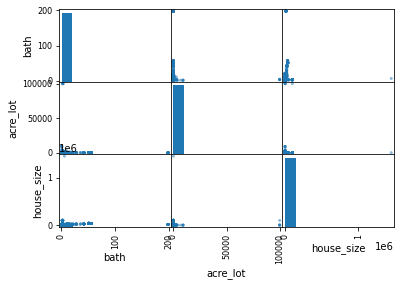

In [12]:
X_train.hist
pd.plotting.scatter_matrix(X_train)

In [13]:
X_train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
bath,44.819651,3146.376273
acre_lot,177.076764,31700.421462
house_size,249.277021,84265.490755


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
Y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.9019347216068527


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
)
classifier.fit(X_train, Y_train)

C:\Users\saidu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\saidu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\saidu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\saidu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
n_samples, n_features = X.shape
Y_score = classifier.decision_function(X_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], Y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), Y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, Y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
from sklearn import tree
!pip install pydotplus
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
data = tree.export_graphviz(dtree, out_file=None)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

You should consider upgrading via the 'C:\Users\saidu\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

wcss=[]
for i in range():
kmeans = KMeans(i)
kmeans.fit(x)
wcss_iter = kmeans.inertia_
wcss.append(wcss_iter)

number_clusters = range()
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(5, 5))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()